<a href="https://colab.research.google.com/github/All4Nothing/pytorch-DL-programming/blob/main/Ch01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. 딥러닝에 꼭 필요한 파이썬의 개념

In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such 

모든 설치가 끝나면 한글 폰트를 바르게 출력하기 위해 **[런타임] -> [런타임 다시시작]**을 클릭한 다음, 아래 셀부터 코드를 실행해 주십시오.

In [1]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

In [2]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

In [3]:
# 파이토치 관련 라이브러리
import torch

## 1.2 컨테이너 타입 변수에 주의

'리스트'나 '넘파이 배열'처럼, 이름으로부터 실제 데이터에 액세스하기 위해 인덱스를 거쳐야 하는 데이터를 '컨테이너 타입'으로 부르기도 한다.

In [4]:
# 넘파이 배열 x를 정의
x = np.array([5, 7, 9])

# 변수 y에 x를 대입
y = x

# 결과 확인
print(x)
print(y)

[5 7 9]
[5 7 9]


In [5]:
# x의 특정 요소를 변경
x[1] = -1

# y도 따라서 값이 바뀜
print(x)
print(y)

[ 5 -1  9]
[ 5 -1  9]


In [6]:
# y도 동시에 변하면 안되는 경우는, 대입 시 copy 함수를 이용함
x = np.array([5, 7, 9])
y = x.copy()

# x의 특정 요소 값이 변해도, y에는 영향이 없음
x[1] = -1
print(x)
print(y)

[ 5 -1  9]
[5 7 9]


**! 그림추가하기**

'a=5' 라는 코드를 작성하면, 우선 'int: 5'(클래스가 int이고 값이 5)라는 상자가 만들어지고, 'a'라는 상자에는, 'int: 5' 상자를 가리키는 포인터가 저장된다.

'x = np.array([5, 7, 9])'라는 코드를 작성하면, 우선 int: 5, int: 7. int: 9 까지 세 값을 넣을 상자가 준비된다. 다음으로, numpy.ndarray 클래스의 상자가 만들어지고, 이 상자에서 앞 3개의 상자로 향하는 포인터가 이어진다. 마지막으로 x라는 상자가 만들어지고, numpy.ndarray로 향하는 포인터가 저장된다.

'y = x'에서는 새로운 상자를 다시 만들지 않고, x가 향하는 부분과 같은 부분을 y도 향할 수 있게 설정해준다.

이처럼 도중에 한 단계를 더 거치는 데이터가 바로 컨테이너 타입이고, 여기에 데이터를 대입할 때는 주의가 필요하다.

In [7]:
import torch

# x1: shape=[5]가 되는 모든 값이 1인 텐서
x1 = torch.ones(5)

# 결과 확인
print(x1)

# x2: x1로부터 생성한 넘파이 배열
x2 = x1.data.numpy()

# 결과 확인
print(x2)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


텐서와 넘파이는 서로 간의 데이터 변환이 가능하지만, 텐서와 넘파이처럼 별개의 클래스 사이에서도 같은 문제가 발생한다

In [8]:
# x1의 값을 변경
x1[1] = -1

# x2의 값도 같이 변함
print(x1)
print(x2)

tensor([ 1., -1.,  1.,  1.,  1.])
[ 1. -1.  1.  1.  1.]


In [9]:
# 안전한 방법

# x1: 텐서
x1 = torch.ones(5)

# x2: x1를 copy한 넘파이
x2 = x1.data.numpy().copy()

x1[1] = -1

# 결과 확인
print(x1)
print(x2)

tensor([ 1., -1.,  1.,  1.,  1.])
[1. 1. 1. 1. 1.]


## 1.3 '합성 함수'를 파이썬으로 구현하기

$f(x) = 2x^2 + 2$를 함수로 정의한다.

In [10]:
def f(x):
    return (2 * x**2 + 2)

In [11]:
# 넘파이 배열로 x를 정의

x = np.arange(-2, 2.1, 0.25)
print(x)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [12]:
# f(x)의 결과를 y에 대입

y = f(x)
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


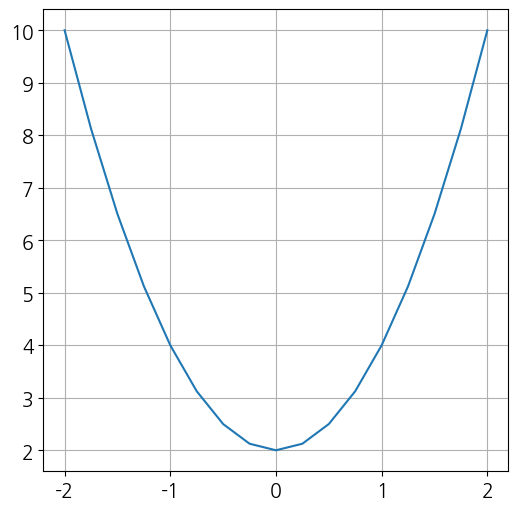

In [13]:
# 함수를 그래프로 그리기

plt.plot(x, y)
plt.show()

In [14]:
# 세 가지 기본 함수의 정의

def f1(x):
    return(x**2)

def f2(x):
    return(x*2)

def f3(x):
    return(x+2)

# 합성 함수 만들기

x1 = f1(x)
x2 = f2(x1)
y = f3(x2)

In [15]:
# 합성 함수 값 확인

print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


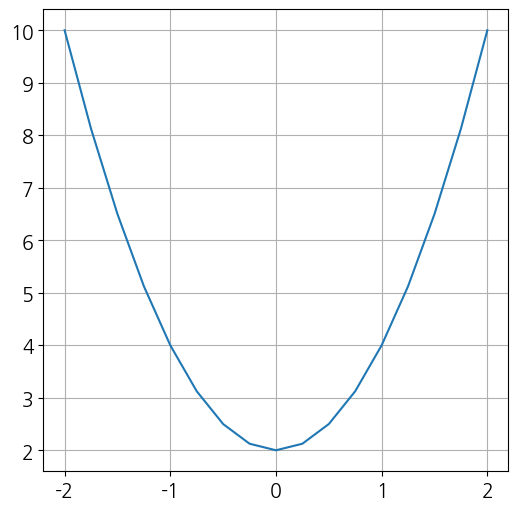

In [16]:
# 합성 함수 그래프 그리기

plt.plot(x, y)
plt.show()

## 1.4 '미분'과 파이썬의 '수치 미분' 구현하기

수학적인 관점에서 딥러닝 알고리즘은 합성 함수와 미분으로 이뤄졌다고 생각해도 된다.

파이썬의 함수 또는 변수명은 단지 포인터이며, 실체는 별개로 존재한다. 이 점을 이용하면, '함수를 인수로 하는 함수'를 만들 수 있다.

파이썬에서 미분 계산은 수치 미분으로 구현한다.

어떤 함수 $f(x)$가 있고, 그 함수의 미분 결과를 알고 싶을 때,f'(x) \fallingdotseq \frac{f(x+h) - f(x-h)}{2h}$ 함수의 h에 매우 작은 값을 넣은 상태에서 위의 근사식을 계산한다.

In [17]:
# 함수를 미분하는 함수 fdiff 의 정의

def fdiff(f):
    # 함수 f를 인수로 미분한 결과 함수를 diff로 정의
    def diff(x):
        h = 1e-6
        return (f(x+h) - f(x-h)) / (2*h)

    # fdiff 의 반환은 미분한 결과 함수 diff
    return diff

In [18]:
# 2차 함수의 수치 미분

# f의 미분 결과 함수 diff를 취득
diff = fdiff(f)

# 미분 결과를 계산하고 y_dash에 대입
y_dash = diff(x)

# 결과 확인
print(y_dash)

[-8. -7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]


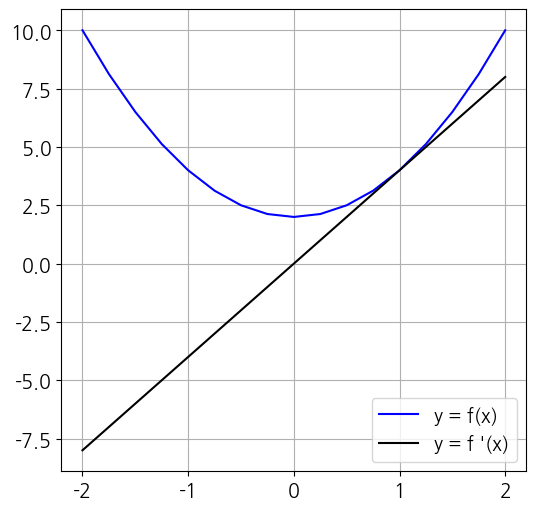

In [19]:
# 결과 그래프 출력

plt.plot(x, y, label=r'y = f(x)', c='b')
plt.plot(x, y_dash, label=r"y = f '(x)", c='k')
plt.legend()
plt.show()

시그모이드 함수 $g(x0 = \frac{1}{1+exp(-x)}$에 대해 같은 계산을 해본다.

In [20]:
# 시그모이드 함수의 정의

def g(x):
    return 1 / (1 + np.exp(-x))

In [21]:
# 시그모이드 함수 계산

y = g(x)
print(y)

[0.1192 0.148  0.1824 0.2227 0.2689 0.3208 0.3775 0.4378 0.5    0.5622
 0.6225 0.6792 0.7311 0.7773 0.8176 0.852  0.8808]


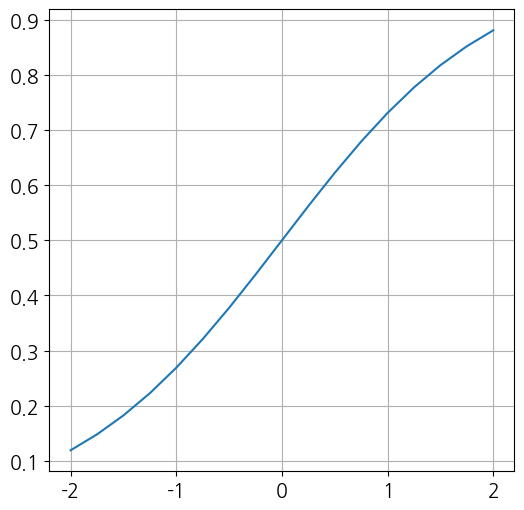

In [22]:
# 그래프 출력

plt.plot(x, y)
plt.show()

In [23]:
# 시그모이드 함수의 수치 미분

# g를 미분한 함수 취득
diff = fdiff(g)

# diff를 사용해 미분 결과 y_dash를 계산
y_dash = diff(x)

# 결과 확인
print(y_dash)

[0.105  0.1261 0.1491 0.1731 0.1966 0.2179 0.235  0.2461 0.25   0.2461
 0.235  0.2179 0.1966 0.1731 0.1491 0.1261 0.105 ]


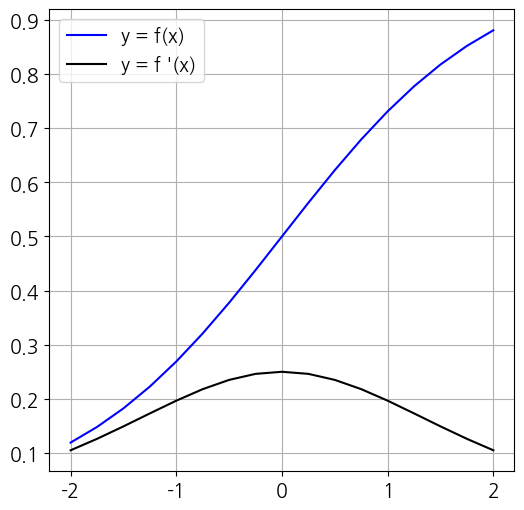

In [24]:
# 결과 그래프 출력

plt.plot(x, y, label=r'y = f(x)', c='b')
plt.plot(x, y_dash, label=r"y = f '(x)", c='k')
plt.legend()
plt.show()

딥러닝의 학습 알고리즘은 '손실'이라고 하는 방대한 파라미터를 가진 복잡한 합성 함수의 미분계산을 수행하고, 그 계산 결과를 이용해서 최적의 파라미터 값을 구하는 구조다. 때문에, 파이토치는 수치미분을 사용한 미분계산을 간단히 처리하는 구조를 내장하고 있는 것이다.

## 1.5 커스텀 클래스 정의하기

파이썬 프로그래밍과 객체 지향과의 관계는, 크게 세 가지 수준으로 나눌 수 있다.  
1. 객체(오브젝트)라는 개념과 무관하게 프로그램을 작성하는 수준  
2. 객체는 사용하지만 기존 클래스의 인스턴스를 생성해서 사용하는 수준 (ex. 사이킷런(scikit-learn)을 사용한 머신러닝 모델 구축  
3. 가장 높은 수준인 사용자의 프로그램 안에 독자적인 클래스를 정의하는 패턴. 독자적인 클래스의 정의는 '커스텀 클래스 정의'라고도 한다.

### 객체 지향의 기초 개념
클래스는 '틀'에 해당하는 개념이고, 인스턴스는 이 '틀'로부터 생성된 개별적인 실체다. 클래스는 '속성'이라고 하는 클래스 안의 변수를 갖는다. 또한, '함수' 또는 '메서드'라고 하는 처리 기능도 존재한다. 속성으로 불리는 클래스 안의 변숫값은 인스턴스마다 다르다.

### 클래스 정의하기

**!그림추가하기**

In [25]:
# 그래프 출력을 위한 라이브러리
import matplotlib.pyplot as plt

# 원을 그리기 위해 필요한 라이브러리
import matplotlib.patches as patches

In [26]:
# Point 클래스 정의
class Point:
    # 인스턴스 생성 시에 두 개의 인수 x와 y를 가짐
    def __init__(self, x, y):
        # 인스턴스 속성 x에 첫 번째 인수를 할당
        self.x = x
        # 인스턴스 속성 y에 두 번째 인수를 할당
        self.y = y

    # draw 함수 정의(인수 없음)
    def draw(self):
        # (x, y)에 점을 그림
        plt.plot(self.x, self.y, marker='o', markersize=10, c='k')

`__init__` 함수는 클래스로부터 인스턴스를 생성할 때, 초기화 처리를 위해 반드시 호출되는 함수다. 그리고 `__init__`함수의 첫 번째 인수로 `self`라는 변수가 있는데, 이 변수는 클래스로부터 인스턴스를 생성할 때, 인스턴스 자신을 가리킨다. 그 다음으로 `self.x = x`라는 행이 이어지는데, 이것은 인스턴스의 속성 x(=self.x)에 `__init__`함수의 파라미터로 값 x를 대입한다는 의미이다. 이때, 파라미터 x는 인스턴스를 생성할 때의 인수로부터 온 것이다.

`__init__`함수와 `draw` 함수 모두 첫 인수가 self로 되어 있는데, 실제로 함수를 호출할 때 이 인수는 지정하지 않는다는 것이다. 따라서 `draw`함수를 호출하는 경우는 인수가 없는 `draw()`와 같은 형태가 된다.

### 인스턴스 생성하기  
인수 리스트의 인수는, `__init__`함수 정의의 인수에서 self를 제외한 것이다. Point 클래스의 경우는, x와 y 총 두개로, 각 인스턴스의 x좌표와 y좌표를 의미한다.

In [27]:
# Point 클래스로 인스턴스 변수 p1과 p2 생성

p1 = Point(2,3)
p2 = Point(-1, -2)

### 인스턴스의 속성으로 접근

In [28]:
# p1과 p2의 속성x, y

print(p1.x, p1.y)
print(p2.x, p2.y)

2 3
-1 -2


### draw 함수의 호출

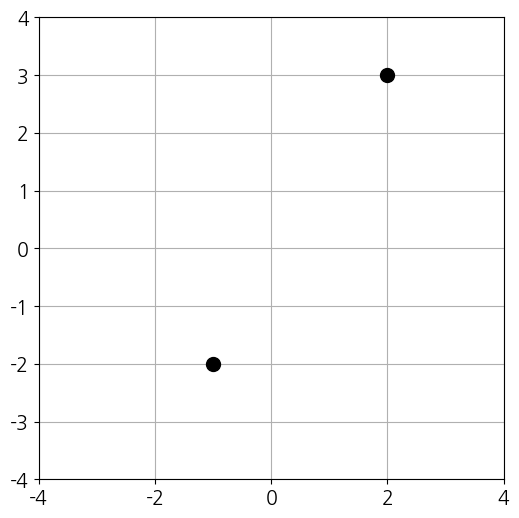

In [29]:
# p1과 p2의 draw 함수를 호출하고, 두 개의 점을 출력함
p1.draw()
p2.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

### Circle1 클래스 정의하기

원 클래스는 Point 클래스의 정의를 똑같이 사용할 수 있다.이처럼 정의를 자연스럽게 재사용하는 것이 '클래스의 상속'이다.

**!그림추가**

In [30]:
# Point의 자식 클래스 Circle 정의 1

class Circle1(Point):
    # Circle은 인스턴스 생성 시에 인수 x, y, r을 가짐
    def __init__(self, x, y, r):
        # x와 y는 부모 클래스의 속성으로 설정
        super().__init__(x, y)
        # r은 Circle의 속성으로 설정
        self.r = r
     
    # 이 단계에서 draw 함수는 정의하지 않음

Circle1 클래스가 Point 클래스의 자식 클래스로 정의된다.  
`super().__init__(x,y)`에서는 Point 클래스의 `__init__`함수를 호출하고 있다.

### Circle1 인스턴스 생성과 속성의 확인

In [31]:
# Circle1 클래스에서 인스턴스 변수 c1_1을 생성
c1_1 = Circle1(1, 0, 2)

In [32]:
# c1_1의 속성 확인
print(c1_1.x, c1_1.y, c1_1.r)

1 0 2


### draw 함수의 호출

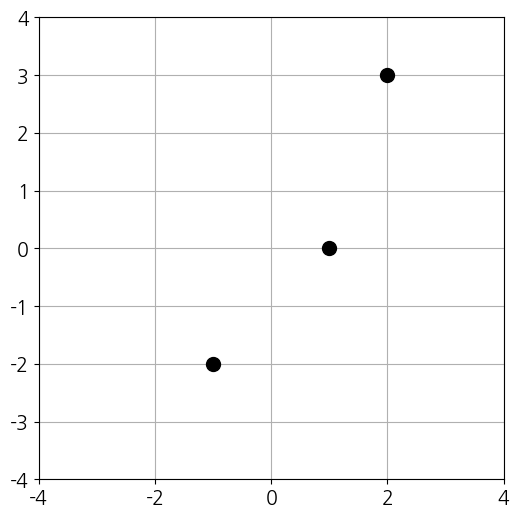

In [33]:
# p1, p2, c1_1의 각 draw 함수를 호출

ax = plt.subplot()
p1.draw()
p2.draw()
c1_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

Circle1 인스턴스에 대해 draw 함수를 호출하면, 새로운 Point 클래스(부모)로 정의한 draw 함수를 불러오는 것을 확인할 수 있다.

### Circle2 클래스 정의하기

In [34]:
# Point의 자식 클래스 Circle의 정의 2

class Circle2(Point):
    # Circle은 인스턴스 생성 시에 인수x, y, r을 가짐
    def __init__(self, x, y, r):
        # x와 y는 부모 클래스의 속성으로 설정
        super().__init__(x, y)
        # r은 Circle의 속성으로 설정
        self.r = r
     
    # draw 함수는 자식 클래스만 따로 원을 그림
    def draw(self):
        # 원 그리기
        c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc='b', ec='k')
        ax.add_patch(c)

### Circle2 인스턴스 생성과 draw 함수의 호출

In [35]:
# Circle2 클래스로부터 인스턴스 변수 c2_1을 생성
c2_1 = Circle2(1, 0, 2)

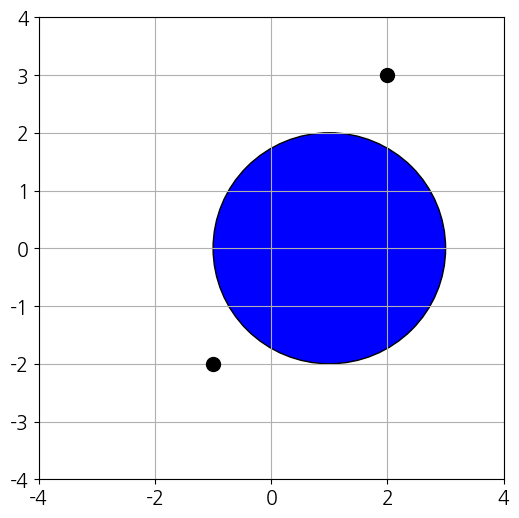

In [36]:
# p1, p2, c2_1의 각 draw 함수를 호출

ax = plt.subplot()
p1.draw()
p2.draw()
c2_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

이번에는 Circle 클래스의 내부에 draw 함수가 정의되어 있으므로, Point 클래스의 draw 함수가 호출되지 않고 내부의 draw 함수만이 호출됐다. 이처럼, 부모 클래스와 같은 이름의 함수를 자식 클래스에서 역할을 달리 정의하는 것을 '오버라이드'라고 부른다.

### Circle3 클래스의 구현

In [37]:
# Point의 자식 클래스 Circle의 정의 3

class Circle3(Point):
    # Circle은 인스턴스 생성 시에 인수 x, y, r을 가짐
    def __init__(self, x, y, r):
        # x와 y는 부모 클래스의 속성으로 설정
        super().__init__(x, y)
        # r은 Circle의 속성으로 설정
        self.r = r
     
    # Circle의 draw 함수는 부모의 함수를 호출한 다음, 원 그리기를 독자적으로 수행함
    def draw(self):
        # 부모 클래스의 draw 함수 호출
        super().draw()
        
        # 원 그리기
        c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc='b', ec='k')
        ax.add_patch(c)

### Circle3 인스턴스 생성과 draw 함수 호출

In [38]:
# Circle3 클래스로부터 인스턴스 변수 c3_1를 생성
c3_1 = Circle3(1, 0, 2)

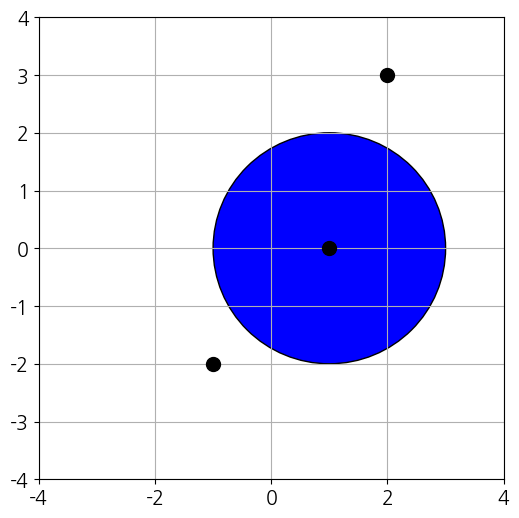

In [39]:
# p1, p2, c3_1의 각 draw 함수를 호출

ax = plt.subplot()
p1.draw()
p2.draw()
c3_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

### 1.6 인스턴스를 함수로 사용하는 방법

클래스에서 생성한 인스턴스를 호출 가능한 함수로 만드는 방법

In [40]:
# 함수 클래스 H의 정의

class H:
    def __call__(self, x):
        return 2*x**2 + 2

In [41]:
# h가 함수로 동작하는지 확인

# 넘파이 배열 x를 정의
x = np.arange(-2, 2.1, 0.25)
print(x)

# H 클래스의 인스턴스로 h를 생성
h = H() 

# 함수 h 호출
y = h(x)
print(y)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]
[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


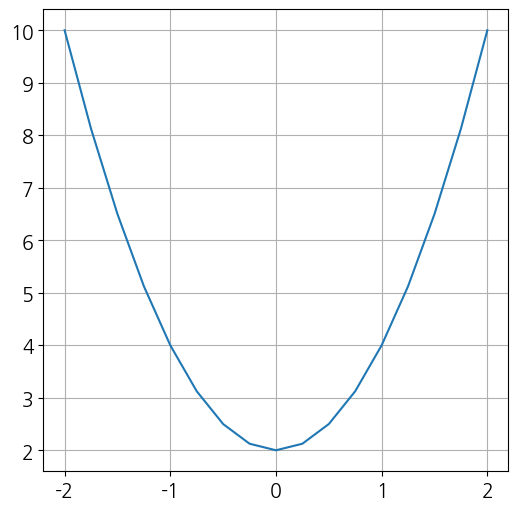

In [42]:
# 그래프 출력

plt.plot(x, y)
plt.show()